In [2]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [3]:
!nvidia-smi

Sat Jun  4 07:45:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
%cd /content/
%rm -rf darknet

/content


In [5]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15420, done.
remote: Total 15420 (delta 0), reused 0 (delta 0), pack-reused 15420
Receiving objects: 100% (15420/15420), 14.02 MiB | 23.28 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.


In [6]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [37]:
#install environment from the Makefile
%cd /content/darknet
# compute_30, sm_30 for Tesla K80
# compute_75, sm_75 for Tesla T4
# !sed -i 's/ARCH= -gencode arch=compute_60,code=sm_60/ARCH= -gencode arch=compute_30,code=sm_30/g' Makefile

#install environment from the Makefile
#note if you are on Colab Pro this works on a P100 GPU
#if you are on Colab free, you may need to change the Makefile for the K80 GPU
#this goes for any GPU, you need to change the Makefile to inform darknet which GPU you are running on.
!make

/content/darknet
chmod +x *.sh


In [8]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [9]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [69]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Classroom
'Colab Notebooks'
 cv.pdf
 dataset-vehicles
 IMG_20211105_213309.jpg
 IMG_6293.JPG
'LAPORAN KEMAJUAN MAGANG INDUSTRI-1.pdf'
'Maket Basket Analisis.pdf'
 nlp
 repo.PNG
'Rizki Nofrian wahyudi (2).pdf'
'Rizki Nofrian Wahyudi_Atlas_SQL1.pdf'
 sertif.pdf
 Sharer.pw
'Siapa tau'
'Surat Approval Pembimbing Universitas untuk Peserta Bangkit 2022-2.pdf'


In [70]:
!ls /content/gdrive/MyDrive/dataset-vehicles

backup	     generate_test.py	obj	   test       vidio
classes.txt  generate_train.py	obj.data   test.txt   yolov3-tiny.cfg
data	     notes.json		obj.names  train.txt  yolov3-tiny.conv.15


In [11]:
!cp /content/gdrive/MyDrive/dataset-vehicles/generate_test.py ./
!cp /content/gdrive/MyDrive/dataset-vehicles/generate_train.py ./

In [72]:
!python generate_test.py
!python generate_train.py

python3: can't open file 'generate_test.py': [Errno 2] No such file or directory
python3: can't open file 'generate_train.py': [Errno 2] No such file or directory


In [71]:
!ls /content/gdrive/MyDrive/dataset-vehicles

backup	     generate_test.py	obj	   test       vidio
classes.txt  generate_train.py	obj.data   test.txt   yolov3-tiny.cfg
data	     notes.json		obj.names  train.txt  yolov3-tiny.conv.15


In [14]:
!cp /content/darknet/cfg/yolov3-tiny.cfg /content/yolov3-tiny.cfg

In [15]:
!wget https://github.com/GotG/yolotinyv3_medmask_demo/raw/master/yolov3-tiny.conv.15

--2022-06-04 06:47:39--  https://github.com/GotG/yolotinyv3_medmask_demo/raw/master/yolov3-tiny.conv.15
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/GotG/yolotinyv3_medmask_demo/master/yolov3-tiny.conv.15 [following]
--2022-06-04 06:47:39--  https://raw.githubusercontent.com/GotG/yolotinyv3_medmask_demo/master/yolov3-tiny.conv.15
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30973396 (30M) [application/octet-stream]
Saving to: ‘yolov3-tiny.conv.15’

yolov3-tiny.conv.15 100%[===================>]  29.54M  --.-KB/s    in 0.1s    

2022-06-04 06:47:41 (256 MB/s) - ‘yolov3-tiny.conv.15’ sav

In [73]:
labels_path = '/content/gdrive/MyDrive/dataset-vehicles/obj.names'
#make a list of your labels
labels = ['Car','Motorcycle','Truck','Bus','Bicycle']
# labels = ['good','bad']

with open(labels_path, 'w') as f:

    f.write('\n'.join(labels))

#check that the labels file is correct
!cat /content/gdrive/MyDrive/dataset-vehicles/obj.names

Car
Motorcycle
Truck
Bus
Bicycle

In [74]:
import re
objdata = '/content/gdrive/MyDrive/dataset-vehicles/obj.data'
with open(objdata) as f:
    s = f.read()

#the number of classes is equal to the number of labels
num_classes = len(labels)   
s = re.sub('classes = \d*','classes = ' + str(num_classes),s)

with open(objdata, 'w') as f:
  f.write(s)
!cat /content/gdrive/MyDrive/dataset-vehicles/obj.data

classes = 5
train = /content/gdrive/MyDrive/dataset-vehicles/train.txt
valid = /content/gdrive/MyDrive/dataset-vehicles/test.txt
names = /content/gdrive/MyDrive/dataset-vehicles/obj.names
backup = /content/gdrive/MyDrive/dataset-vehicles/backup

In [75]:
# set the number of max_batches - min 2000 per class:
max_batch=4000
# calculate the 2 steps values:
step1 = 0.8 * max_batch
step2 = 0.9 * max_batch

# we also need to adjust the number of classes and a parameter called filter size 
# that are both is inside the model structure

# num_classes = len(labels)
num_filters = (num_classes + 5) * 3


#cfg_file = '/content/yolotinyv3_medmask_demo/yolov3-tiny_obj.cfg'
cfg_file = '/content/gdrive/MyDrive/dataset-vehicles/yolov3-tiny.cfg'

with open(cfg_file) as f:
    s = f.read()
# (re.sub('[a-z]*@', 'ABC@', s))
s = re.sub('max_batches = \d*','max_batches = '+str(max_batch),s)
s = re.sub('steps=\d*,\d*','steps='+"{:.0f}".format(step1)+','+"{:.0f}".format(step2),s)
s = re.sub('classes=\d*','classes='+str(num_classes),s)
s = re.sub('pad=1\nfilters=\d*','pad=1\nfilters='+"{:.0f}".format(num_filters),s)
# pad=1\nfilters=\d\d
# s = re.sub('CUDNN=0','CUDNN=1',s)
# s = re.sub('OPENCV=0','OPENCV=1',s)

with open(cfg_file, 'w') as f:
  # s = re.sub('GPU=0','GPU=1',s)
  f.write(s)

In [ ]:
%cd /content/darknet
!./darknet detector train /content/gdrive/MyDrive/dataset-vehicles/obj.data /content/gdrive/MyDrive/dataset-vehicles/yolov3-tiny.cfg /content/gdrive/MyDrive/dataset-vehicles/yolov3-tiny.conv.15 -dont_show -ext_output -map

Output streaming akan dipotong hingga 5000 baris terakhir.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.736282), count: 44, class_loss = 0.894249, iou_loss = 0.320828, total_loss = 1.215077 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.664220), count: 23, class_loss = 0.474325, iou_loss = 0.296429, total_loss = 0.770754 
 total_bbox = 216343, rewritten_bbox = 0.228341 % 


 Tensor Cores are disabled until the first 3000 iterations are reached.
 (next mAP calculation at 1900 iterations) ]2;1827/4000: loss=0.9 hours left=0.7
 1827: 0.885085, 0.998529 avg loss, 0.001000 rate, 1.428726 seconds, 116928 images, 0.656308 hours left
Loaded: 0.000064 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.731610), count: 35, class_loss = 0.666399, iou_loss = 0.337267, total_loss = 1.003667 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.517744), count:

In [1]:
imShow("chart_yolov3-tiny.png")

NameError: ignored

In [13]:
%cd /content/darknet
!./darknet detector map /content/gdrive/MyDrive/dataset-vehicles/obj.data /content/gdrive/MyDrive/dataset-vehicles/yolov3-tiny.cfg "/content/gdrive/MyDrive/dataset-vehicles/backup/yolov3-tiny_best.weights" -points 0

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 -> 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 

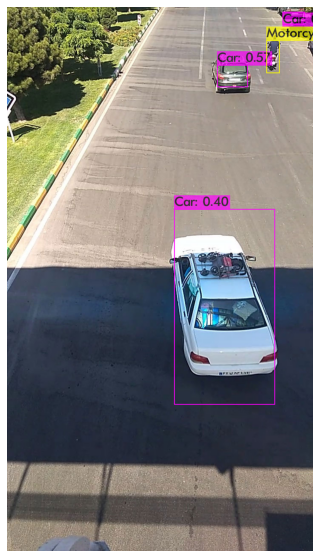

In [23]:
!./darknet detector test /content/gdrive/MyDrive/dataset-vehicles/obj.data /content/gdrive/MyDrive/dataset-vehicles/yolov3-tiny.cfg "/content/gdrive/MyDrive/dataset-vehicles/backup/yolov3-tiny_best.weights" /content/gdrive/MyDrive/dataset-vehicles/obj/189.jpg -ext_output
imShow('predictions.jpg')


In [82]:
from google.colab import files

uploaded = files.upload()

Saving testvidio.mp4 to testvidio.mp4


In [83]:
!./darknet detector demo /content/gdrive/MyDrive/dataset-vehicles/obj.data /content/gdrive/MyDrive/dataset-vehicles/yolov3-tiny.cfg "/content/gdrive/MyDrive/dataset-vehicles/backup/yolov3-tiny_best.weights" -dont_show  testvidio.mp4 -i 0 -out_filename results.avi

Output streaming akan dipotong hingga 5000 baris terakhir.

FPS:44.5 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 34% 

FPS:45.1 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 34% 

FPS:44.5 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 31% 

FPS:43.7 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 40% 
Car: 28% 

FPS:42.9 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 44% 
Car: 26% 

FPS:44.8 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 30% 
Car: 30% 

FPS:44.5 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 39% 
Car: 34% 
Car: 25% 

FPS:44.5 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 40% 
Car: 35% 
Car: 25% 

FPS:43.2 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 55% 
Car: 28% 

FPS:41.9 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:

Car: 61% 
Car: 27% 

FPS:41.6 	 AVG_FPS:36.4

 cvWriteFrame 
Objects:

Car: 54% 

FPS:40.0 	 AVG_FPS:36.4

 cvWriteFrame 
Objects:

Car: 59% 

FPS:39.5 	 AVG_FPS:36.4

 cvWriteFrame 
Objects:

Car: 51% 

FPS:39.1 	 AVG_FPS:36.4

 cvWriteFrame 
Objects:

Car: 53

In [84]:
from google.colab import files

video_path = 'results.avi'
files.download(video_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>